As respostas estão destacadas em azul

In [ ]:
print('\033[94m' + '\x1B[1m' + 'respostas')
print('\x1b[0m')

respostas



**Questão 1**

Abaixo temos o investimento de mídia da empresa ao longo de 30 dias, se a empresa investir 6 mil reais em mídia, quanto você estima que seria a receita? Como você chegou nessa resposta?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#passando a tabela da questão para dataframe

df = pd.DataFrame()

df['dias'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
df['investimento'] = [10, 12, 13, 5, 4, 12, 8, 9, 10, 12, 5, 4, 3, 2, 5, 10, 1, 4, 4, 0, 1, 5, 1, 8, 8, 7, 4, 10, 11, 11]
df['vendas'] = [3544.89, 4225.56, 4558.72, 1803.32, 1477.76, 4189.67, 2791.15, 3166.08, 3567.93, 4200.60, 1751.70, 1428.69, 1122.28,
                718.94, 1789.82, 3565.52, 393.66, 1433.55, 1439.02, 65.33, 386.36, 1775.54, 430.75, 2796.94, 2811.29, 2433.76,
                1421.76, 3470.20, 3845.47, 3832.74]

In [ ]:
df.head()

,dias,investimento,vendas
0,1,10,3544.89
1,2,12,4225.56
2,3,13,4558.72
3,4,5,1803.32
4,5,4,1477.76


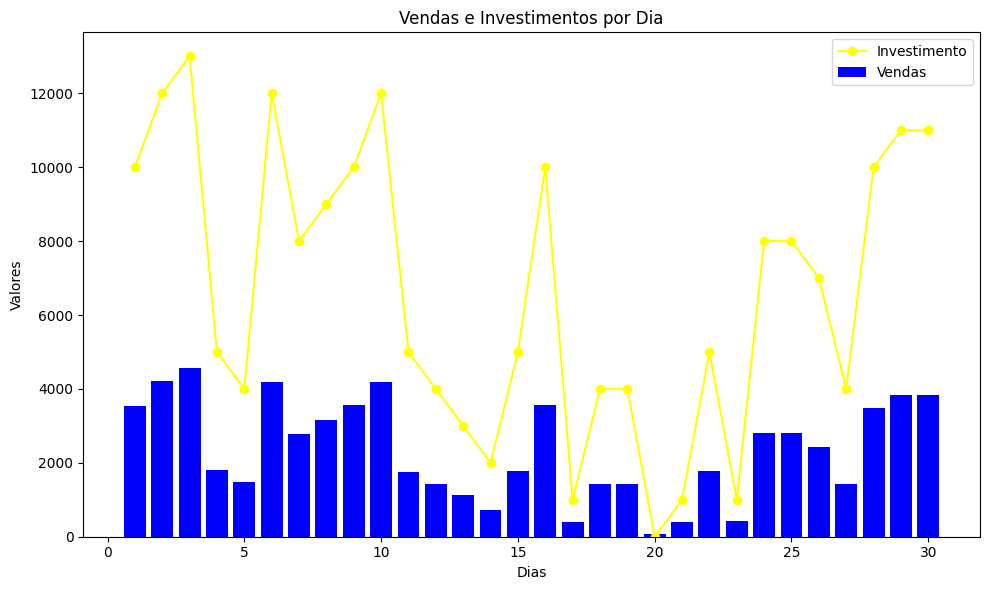

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

#Gráfico de barras para as vendas
ax.bar(df['dias'], df['vendas'], color='blue', label='Vendas')

#Gráfico de linha para os investimentos
ax.plot(df['dias'], df['investimento']*1000, color='yellow', marker='o', label='Investimento')

#Adicionando rótulos aos eixos
ax.set_xlabel('Dias')
ax.set_ylabel('Valores')

#Adicionando uma legenda
ax.legend()

#Adicionando um título
ax.set_title('Vendas e Investimentos por Dia')

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

O gráfico permite visualizar que há uma relação diretamente proporcional entre o investimento em mídia e o volume de vendas. Dessa forma, irei tentar um modelo de regressão linear para estimar a quantidade de vendas com o investimento de 6 mil reais.

In [ ]:
from sklearn.linear_model import LinearRegression

#Separando as variáveis independentes (X) e dependentes (y)
X = df[['investimento']]
y = df['vendas']

#Criando um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

#Fazendo a previsão para os dados de treino
y_pred = modelo.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

#Calculando o coeficiente de determinação (R²) e o erro médio quadrático (MSE)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"Coeficiente de Determinação (R²): {r2:.4f}")
print(f"Erro Médio Quadrático (MSE): {mse:.2f}")

Coeficiente de Determinação (R²): 0.9996
Erro Médio Quadrático (MSE): 665.52


O R² do modelo indica que 99,96% da variabilidade nas vendas é explicada pelo investimento e o MSE de 665,52 é uma medida relativamente baixa, demonstrando que o modelo de regressão linear é fortemente adequado para prever as futuras vendas baseado nos investimentos.

In [ ]:
#Fazendo a previsão para um investimento de 6000 reais
investimento_previsto = [[6]]
dados_previstos = pd.DataFrame(investimento_previsto, columns=['investimento'])
vendas_previstas = modelo.predict(dados_previstos)

print( '\033[94m' + '\x1B[1m' + f"Previsão de vendas para um investimento de 6000 reais em marketing: R${vendas_previstas[0]:.2f}")
print('\x1b[0m')

Previsão de vendas para um investimento de 6000 reais em marketing: R$2128.94





---



**Questão 2**

Abaixo temos os resultados do Período 1 e do Período 2 de uma loja online, que vende produtos de 4 departamentos diferentes e aceita pagamentos por 4 meios de pagamentos diferentes.

Como foi o desempenho da loja no Período 2 em relação ao Período 1? Que departamento mais contribuiu para esse resultado?

No Período 2 houve uma ação promocional do departamento de informática para os clientes que pagassem utilizando Paypal, como foi o desempenho dessa ação?

In [ ]:
#Dados
dados = {
    'periodo': [1]*16 + [2]*16,
    'tempo_site': [2.3]*16 + [2.4]*16,
    'departamento': ['Informática']*4 + ['Telefonia']*4 + ['Móveis']*4 + ['Eletrodomésticos']*4 +
                    ['Informática']*4 + ['Telefonia']*4 + ['Móveis']*4 + ['Eletrodomésticos']*4,
    'visualizacao': [2301]*4 + [2847]*4 + [5174]*4 + [6591]*4 + [2860]*4 + [3523]*4 + [4173]*4 + [5447]*4,
    'ticket_medio': [1100]*4 + [980]*4 + [500]*4 + [300]*4 + [1000]*4 + [900]*4 + [510]*4 + [300]*4,
    'meio_pagamento': ['Paypal', 'Master Card', 'Visa', 'Boleto']*8,
    'vendas': [17, 53, 53, 54, 33, 49, 47, 90, 57, 85, 78, 178, 40, 117, 106, 244,
               21, 66, 66, 67, 39, 58, 53, 121, 37, 71, 65, 148, 26, 136, 100, 157]
}

#Criando o DataFrame
df = pd.DataFrame(dados)

df

,periodo,tempo_site,departamento,visualizacao,ticket_medio,meio_pagamento,vendas
0,1,2.3,Informática,2301,1100,Paypal,17
1,1,2.3,Informática,2301,1100,Master Card,53
2,1,2.3,Informática,2301,1100,Visa,53
3,1,2.3,Informática,2301,1100,Boleto,54
4,1,2.3,Telefonia,2847,980,Paypal,33
5,1,2.3,Telefonia,2847,980,Master Card,49
6,1,2.3,Telefonia,2847,980,Visa,47
7,1,2.3,Telefonia,2847,980,Boleto,90
8,1,2.3,Móveis,5174,500,Paypal,57
9,1,2.3,Móveis,5174,500,Master Card,85


Por enquanto, irei desconsiderar o meio de pagamento e verificar quanto cada departamento vendeu em cada período.

In [ ]:
#Criando um novo DataFrame sem a coluna 'meio_pagamento' e agrupando as vendas por departamento para cada período
df_agrupado = df.groupby(['periodo', 'departamento'], as_index=False).agg({
    'tempo_site': 'mean',
    'visualizacao': 'mean',
    'ticket_medio': 'mean',
    'vendas': 'sum'
})

# Exibindo o novo DataFrame
df_agrupado

,periodo,departamento,tempo_site,visualizacao,ticket_medio,vendas
0,1,Eletrodomésticos,2.3,6591.0,300.0,507
1,1,Informática,2.3,2301.0,1100.0,177
2,1,Móveis,2.3,5174.0,500.0,398
3,1,Telefonia,2.3,2847.0,980.0,219
4,2,Eletrodomésticos,2.4,5447.0,300.0,419
5,2,Informática,2.4,2860.0,1000.0,220
6,2,Móveis,2.4,4173.0,510.0,321
7,2,Telefonia,2.4,3523.0,900.0,271


In [ ]:
#Criando uma coluna de vendas totais

df_agrupado['total_vendas'] = df_agrupado['vendas']*df_agrupado['ticket_medio']

df_agrupado

,periodo,departamento,tempo_site,visualizacao,ticket_medio,vendas,total_vendas
0,1,Eletrodomésticos,2.3,6591.0,300.0,507,152100.0
1,1,Informática,2.3,2301.0,1100.0,177,194700.0
2,1,Móveis,2.3,5174.0,500.0,398,199000.0
3,1,Telefonia,2.3,2847.0,980.0,219,214620.0
4,2,Eletrodomésticos,2.4,5447.0,300.0,419,125700.0
5,2,Informática,2.4,2860.0,1000.0,220,220000.0
6,2,Móveis,2.4,4173.0,510.0,321,163710.0
7,2,Telefonia,2.4,3523.0,900.0,271,243900.0


In [ ]:
#Somando o total de vendas por período
total_por_periodo = df_agrupado.groupby('periodo')['total_vendas'].sum()

#Exibindo o total de vendas por período
print(total_por_periodo)

periodo
1    760420.0
2    753310.0
Name: total_vendas, dtype: float64


In [ ]:
#Calculando a diferença percentual entre os períodos
diferenca_percentual = ((total_por_periodo[1] - total_por_periodo[2]) / total_por_periodo[1]) * 100

#Exibindo a diferença percentual
print(f'Diferença percentual entre os períodos 1 e 2: {diferenca_percentual:.2f}%')

Diferença percentual entre os períodos 1 e 2: 0.94%


A diferença entre as vendas totais de ambos os períodos foi mínima, inferior a 1%. Irei verificar a influência de cada departamento nesse resultado.

In [ ]:
#Calculando a contribuição percentual de cada departamento no total de vendas por período
df_agrupado['contribuicao_percentual'] = df_agrupado['total_vendas'] / df_agrupado.groupby('periodo')['total_vendas'].transform('sum') * 100

df_agrupado

,periodo,departamento,tempo_site,visualizacao,ticket_medio,vendas,total_vendas,contribuicao_percentual
0,1,Eletrodomésticos,2.3,6591.0,300.0,507,152100.0,20.002104
1,1,Informática,2.3,2301.0,1100.0,177,194700.0,25.604271
2,1,Móveis,2.3,5174.0,500.0,398,199000.0,26.169748
3,1,Telefonia,2.3,2847.0,980.0,219,214620.0,28.223876
4,2,Eletrodomésticos,2.4,5447.0,300.0,419,125700.0,16.686358
5,2,Informática,2.4,2860.0,1000.0,220,220000.0,29.204444
6,2,Móveis,2.4,4173.0,510.0,321,163710.0,21.732089
7,2,Telefonia,2.4,3523.0,900.0,271,243900.0,32.377109


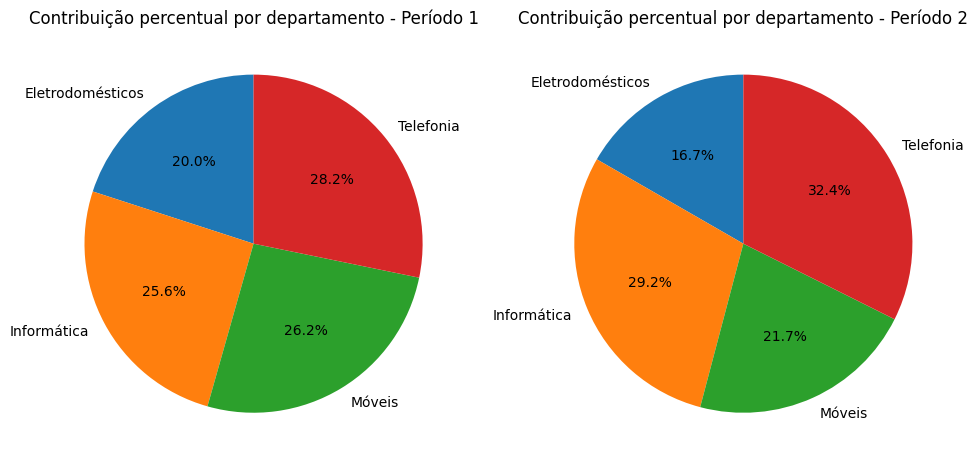

In [ ]:
#Criando dois gráficos de pizza
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

for periodo, ax in zip([1, 2], axs):
    dados_periodo = df_agrupado[df_agrupado['periodo'] == periodo]
    ax.pie(dados_periodo['contribuicao_percentual'], labels=dados_periodo['departamento'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Contribuição percentual por departamento - Período {periodo}')

plt.tight_layout()
plt.show()

É possível observar nos gráficos acima que houve uma mudança dos shares dos departamentos nos períodos analisados. Telefonia continuou como o departamento que mais contribuiu, tendo aumentado a sua significância. O setor de eletrodomésticos continuou como o departamento que menos contribuiu, tendo diminuído a sua significância. Os departamentos de informática e móveis inverteram suas posições no ranking.

Como o período 1 apresentou melhores resultados do que o período 2, irei verificar a influência dos departamentos para que esse resultado ocorresse.

In [ ]:
#Verificando a diferença percentual dos departamentos entre os períodos

#Pivotando os dados para facilitar o cálculo da diferença percentual
df_pivot = df_agrupado.pivot(index='departamento', columns='periodo', values='contribuicao_percentual').reset_index()

#Calculando a diferença percentual entre os períodos
df_pivot['diferenca_percentual'] = df_pivot[1] - df_pivot[2]

df_pivot

periodo,departamento,1,2,diferenca_percentual
0,Eletrodomésticos,20.002104,16.686358,3.315747
1,Informática,25.604271,29.204444,-3.600173
2,Móveis,26.169748,21.732089,4.437659
3,Telefonia,28.223876,32.377109,-4.153233


In [ ]:
#Calculando a diferença total entre os períodos
diferenca_total = total_por_periodo[1] - total_por_periodo[2]

#Identificando o departamento que mais contribuiu para a diferença
departamento_contribuicao_maxima = df_pivot.sort_values(by='diferenca_percentual', ascending=False).iloc[0]['departamento']
contribuicao_maxima = df_pivot.sort_values(by='diferenca_percentual', ascending=False).iloc[0]['diferenca_percentual']

In [ ]:
#Irei verificar agora a diferença de leads no site entre os dois períodos
df_agrupado['leads_percentual'] = df_agrupado['visualizacao'] / df_agrupado.groupby('periodo')['visualizacao'].transform('sum') * 100

df_agrupado

,periodo,departamento,tempo_site,visualizacao,ticket_medio,vendas,total_vendas,contribuicao_percentual,leads_percentual
0,1,Eletrodomésticos,2.3,6591.0,300.0,507,152100.0,20.002104,38.970023
1,1,Informática,2.3,2301.0,1100.0,177,194700.0,25.604271,13.604919
2,1,Móveis,2.3,5174.0,500.0,398,199000.0,26.169748,30.591852
3,1,Telefonia,2.3,2847.0,980.0,219,214620.0,28.223876,16.833205
4,2,Eletrodomésticos,2.4,5447.0,300.0,419,125700.0,16.686358,34.037368
5,2,Informática,2.4,2860.0,1000.0,220,220000.0,29.204444,17.871649
6,2,Móveis,2.4,4173.0,510.0,321,163710.0,21.732089,26.076361
7,2,Telefonia,2.4,3523.0,900.0,271,243900.0,32.377109,22.014622


In [ ]:
#Somando o total de leads por período
total_leads_por_periodo = df_agrupado.groupby('periodo')['visualizacao'].sum()

#Exibindo o total de vendas por período
print(total_leads_por_periodo)

periodo
1    16913.0
2    16003.0
Name: visualizacao, dtype: float64


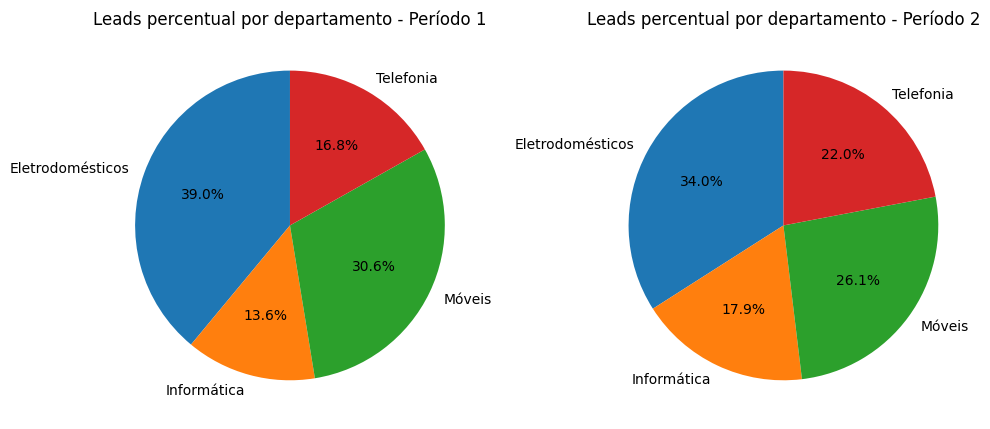

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

for periodo, ax in zip([1, 2], axs):
    dados_periodo = df_agrupado[df_agrupado['periodo'] == periodo]
    ax.pie(dados_periodo['leads_percentual'], labels=dados_periodo['departamento'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Leads percentual por departamento - Período {periodo}')

plt.tight_layout()
plt.show()

É possível observar a mudança na distribuição dos leads no site, irei analisar quanto foi essa diferença.

In [ ]:
#Verificando a diferença de leads dos departamentos entre os períodos

#Pivotando os dados para facilitar o cálculo da diferença percentual
df_pivot_leads = df_agrupado.pivot(index='departamento', columns='periodo', values='leads_percentual').reset_index()

#Calculando a diferença percentual entre os períodos
df_pivot_leads['leads_percentual'] = df_pivot_leads[1] - df_pivot_leads[2]

df_pivot_leads

periodo,departamento,1,2,leads_percentual
0,Eletrodomésticos,38.970023,34.037368,4.932655
1,Informática,13.604919,17.871649,-4.266730
2,Móveis,30.591852,26.076361,4.515492
3,Telefonia,16.833205,22.014622,-5.181417


In [ ]:
#Calculando a diferença percentual entre os períodos
diferenca_percentual_leads = ((total_leads_por_periodo[1] - total_leads_por_periodo[2]) / total_leads_por_periodo[2]) * 100

#Exibindo a diferença percentual
print(f'Diferença percentual de leads entre os períodos 1 e 2: {diferenca_percentual_leads:.2f}%')

Diferença percentual de leads entre os períodos 1 e 2: 5.69%


In [ ]:
#Calculando a diferença total entre os períodos
diferenca_leads_total = total_leads_por_periodo[1] - total_leads_por_periodo[2]

#Identificando o departamento que mais contribuiu para a diferença
departamento_contribuicao_maxima_leads = df_pivot_leads.sort_values(by='leads_percentual', ascending=False).iloc[0]['departamento']
contribuicao_maxima_leads = df_pivot_leads.sort_values(by='leads_percentual', ascending=False).iloc[0]['leads_percentual']

In [ ]:
df_pivot

periodo,departamento,1,2,diferenca_percentual
0,Eletrodomésticos,20.002104,16.686358,3.315747
1,Informática,25.604271,29.204444,-3.600173
2,Móveis,26.169748,21.732089,4.437659
3,Telefonia,28.223876,32.377109,-4.153233


In [ ]:
# Exibindo o resultado
print( '\033[94m' + '\x1B[1m' + f'Diferença Total Vendas: - R${diferenca_total:}')
print(f'Diferença percentual vendas: -{diferenca_percentual:.2f}%')
print(f'Departamento com maior diferença em vendas: {departamento_contribuicao_maxima} (Diferença: -{contribuicao_maxima:.2f}%)')
print(f'Diferença Total Leads: -{diferenca_leads_total:.0f}')
print(f'Diferença percentual leads: -{diferenca_percentual_leads:.2f}%')
print(f'Departamento com maior diferença em leads: {departamento_contribuicao_maxima_leads} (Diferença: -{contribuicao_maxima_leads:.2f}%)')
print('\x1b[0m')

Diferença Total Vendas: - R$7110.0
Diferença percentual vendas: -0.94%
Departamento com maior diferença em vendas: Móveis (Diferença: -4.44%)
Diferença Total Leads: -910
Diferença percentual leads: -5.69%
Departamento com maior diferença em leads: Eletrodomésticos (Diferença: -4.93%)



**Logo, o período 2 apresentou desempenho inferior ao período 1, com a diminuição em 0,94% do total de vendas, sendo o departamento de móveis com a maior diferença. Já em número de leads no site, a diferença percentual foi de -5,69% no período 2 comparado ao período 1, com o departamento de eletrodomésticos sendo o maior responsável por essa queda.**

Agora irei analisar a influência da ação promocional do departamento de informática que ocorreu no período 2 para clientes que pagassem utilizando Paypal.

In [ ]:
#Separando do dataframe original apenas as vendas no departamento de informática com paypal

df_promocao = df[(df['departamento'] == 'Informática') & (df['meio_pagamento'] == 'Paypal')].reset_index(drop=True)
df_promocao

,periodo,tempo_site,departamento,visualizacao,ticket_medio,meio_pagamento,vendas
0,1,2.3,Informática,2301,1100,Paypal,17
1,2,2.4,Informática,2860,1000,Paypal,21


In [ ]:
df_promocao['vendas_totais'] = df_promocao['ticket_medio'] * df_promocao['vendas']
df_promocao

,periodo,tempo_site,departamento,visualizacao,ticket_medio,meio_pagamento,vendas,vendas_totais
0,1,2.3,Informática,2301,1100,Paypal,17,18700
1,2,2.4,Informática,2860,1000,Paypal,21,21000


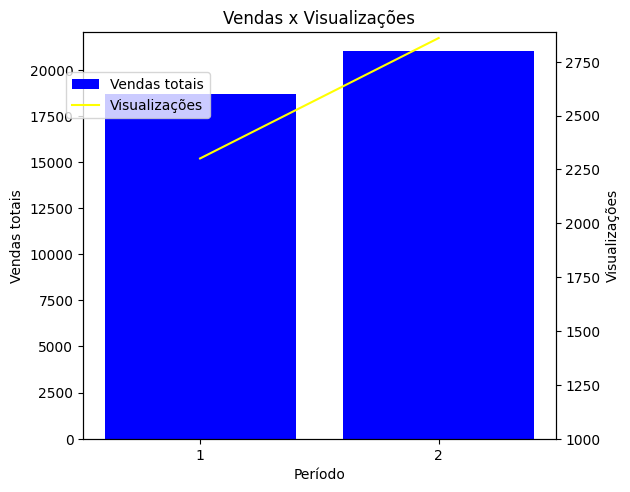

In [ ]:
#Criando o gráfico com eixo y duplo
fig, ax1 = plt.subplots()

#Barra para 'vendas_totais'
ax1.bar(df_promocao['periodo'], df_promocao['vendas_totais'], color='blue', label='Vendas totais')
ax1.set_xlabel('Período')
ax1.set_ylabel('Vendas totais', color='black')
ax1.tick_params('y', colors='black')

ax1.set_xticks([1, 2])
ax1.set_xticklabels([1, 2])

#Criando eixo y à direita
ax2 = ax1.twinx()
#Linha para 'visualizacao'
ax2.plot(df_promocao['periodo'], df_promocao['visualizacao'], color='yellow', label='Visualizações')
ax2.set_ylabel('Visualizações', color='black')
ax2.tick_params('y', colors='black')

#Configurando o limite inferior do eixo y à direita
ax2.set_ylim(1000)

#Adicionando legenda ao gráfico
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

#Exibindo o gráfico
plt.title('Vendas x Visualizações')
plt.show()

É possível verificar através do gráfico o resultado positivo que teve a ação promocional de vendas no paypal no departamento de informática. Vamos calcular quanto foi esse resultado.

In [ ]:
#Calculando a diferença percentual para 'vendas_totais' e 'visualizacao' entre os períodos
diff_vendas = df_promocao[df_promocao['periodo'] == 2]['vendas_totais'][1] - df_promocao[df_promocao['periodo'] == 1]['vendas_totais'][0]
diff_vendas_perc = diff_vendas/df_promocao[df_promocao['periodo'] == 2]['vendas_totais'][1]
diff_visualizacao = df_promocao[df_promocao['periodo'] == 2]['visualizacao'][1] - df_promocao[df_promocao['periodo'] == 1]['visualizacao'][0]
diff_visualizacao_perc = diff_visualizacao/df_promocao[df_promocao['periodo'] == 2]['visualizacao'][1]

print('\033[94m' + '\x1B[1m' + f'Diferença de vendas: {diff_vendas_perc * 100:.2f}%')
print(f'Diferença de visualizações: {diff_visualizacao_perc * 100:.2f}%')
print('A promoção teve impacto positivo nas vendas do departamento de informática para o pagamento de paypal, tanto para vendas quanto para geração de leads.')
print('\x1b[0m')

Diferença de vendas: 10.95%
Diferença de visualizações: 19.55%
A promoção teve impacto positivo nas vendas do departamento de informática para o pagamento de paypal, tanto para vendas quanto para geração de leads.





---



**Questão 3**

O Bar do João vende bolinho de carne e por mês compra 2 toneladas de carne, 100 kg de tempero, 400 litros de óleo, 20 kg de sal e seu custo de operação (aluguel, funcionários e contas de água, energia e gás) é de R$15000. Sendo que cada bolinho utiliza 100 g de carne e o bar funciona 8h por dia durante 6 dias na semana, qual seria sua estratégia para precificar cada bolinho? Qual seria seu preço de venda?

In [ ]:
#Irei começar verificando os custos por mês do bar
gastos_insumos = 2 * 1000 * 4 + 100 * 1 + 400 * 3.5 + 20 * 0.8
gastos_insumos

9516.0

In [ ]:
gastos_operacoes = 15000

#Irei considerar 4 semanas para o mês
#Logo o bar funciona 4 semanas * 6 dias * 8h = 192h/mes
gastos_por_hora = (gastos_insumos + gastos_operacoes)/192
gastos_por_hora

127.6875

* Nos dados disponíveis temos o histórico de vendas com a quantidade vendida
por hora e o preço unitário
* Irei calcular o gasto unitário do histórico, ou seja, o gastos_por_hora/quantidade vendida por hora
* A partir disso, eu irei calcular o lucro unitário (preço unitário - gasto unitário)
* E por fim o lucro total por hora (lucro unitário * quantidade vendida)
* Os cálculos podem ser consultados aqui: https://docs.google.com/spreadsheets/d/1OGJIOQPsalJnu98zRfn07wXMhao6O_UE/edit?usp=sharing&ouid=103064709371419189448&rtpof=true&sd=true
* Os dados foram então baixados em csv e carregados nesse notebook

In [ ]:
arquivo = 'dados.csv'

df = pd.read_csv(arquivo)

df.head()

,Quantidade Vendida por hora,Preço Unitário,gasto unitário,lucro unitário,lucro total
0,90.0,2.01,1.42,0.59,52.94
1,30.0,4.75,4.26,0.50,14.90
2,20.0,6.78,6.38,0.40,7.98
3,110.0,1.28,1.16,0.12,12.66
4,90.0,1.39,1.42,-0.02,-2.23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Quantidade Vendida por hora  500 non-null    float64
 1   Preço Unitário               500 non-null    float64
 2   gasto unitário               500 non-null    float64
 3   lucro unitário               500 non-null    float64
 4   lucro total                  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [ ]:
#Dia de máximo de vendas

max_vendas = max(df['Quantidade Vendida por hora'])
max_vendas

110.0

In [ ]:
df[df['Quantidade Vendida por hora'] == 110]

,Quantidade Vendida por hora,Preço Unitário,gasto unitário,lucro unitário,lucro total
3,110.0,1.28,1.16,0.12,12.66
8,110.0,1.83,1.16,0.67,73.89
22,110.0,1.88,1.16,0.72,79.07
41,110.0,1.66,1.16,0.50,54.77
42,110.0,1.77,1.16,0.61,67.55
51,110.0,1.37,1.16,0.21,23.14
71,110.0,1.70,1.16,0.54,58.93
73,110.0,1.72,1.16,0.56,61.07
78,110.0,1.51,1.16,0.35,38.77
95,110.0,1.58,1.16,0.42,46.59


In [ ]:
#Melhor lucro unitário para esse dia de melhor venda

lucro_melhor_venda = max(df[df['Quantidade Vendida por hora'] == 110]['lucro unitário'])
lucro_melhor_venda

0.72

In [ ]:
#Dia com melhor lucro unitário

max_lucro = max(df['lucro unitário'])
max_lucro

0.72

Como podemos ver, o dia de melhor venda foi também o dia que obtivemos o melhor lucro unitário. Logo, os dados mostram que o melhor preço de venda do bolinho é quando temos o lucro de R$0,72. Vamos ver por quanto o bolinho foi vendido nos dias de lucro unitário otimizado.

In [ ]:
df[df['lucro unitário'] == 0.72]

,Quantidade Vendida por hora,Preço Unitário,gasto unitário,lucro unitário,lucro total
22,110.0,1.88,1.16,0.72,79.07
287,110.0,1.88,1.16,0.72,79.13


In [ ]:
#Salvando o preço unitário

preco_unitario = df[df['lucro unitário'] == 0.72]['Preço Unitário'][22]
print('\033[94m' + '\x1B[1m' + f'O melhor preço unitário para o bolinho é R${preco_unitario}')
print('\x1b[0m')

O melhor preço unitário para o bolinho é R$1.88



In [ ]:
#Vamos também ver quantos bolinhos o Bar do João tem que vender para cobrir seus gastos mensais
#E ainda obter o lucro de 20%

gastos_mensal = gastos_insumos + gastos_operacoes
ganho_mensal = gastos_mensal*1.2

print(f"O ganho mensal para pagar as contas e obter 20% de lucro: R${ganho_mensal}")

O ganho mensal para pagar as contas e obter 20% de lucro: R$29419.2


In [ ]:
qde_bolinhos = ganho_mensal/max_lucro
print(f"Para isso, o Bar do João tem que vender {qde_bolinhos:.0f} bolinhos por mês")

Para isso, o Bar do João tem que vender 40860 bolinhos por mês


In [ ]:
bolinhos_por_hora = qde_bolinhos/192
print(f"Assim, o Bar do João tem que vender {bolinhos_por_hora:.0f} bolinhos por hora")

Assim, o Bar do João tem que vender 213 bolinhos por hora
